<a href="https://colab.research.google.com/github/Azariagmt/data-science-notebooks/blob/master/Breast_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Objective:** to determine if the cancer is Malignant or Benign.

In [43]:
import pandas as pd
breast_cancer_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv', index_col='id')
df_with_id =  pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv')
data = breast_cancer_data
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
914102,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,0.05888,0.3237,1.473,2.326,26.07,0.007802,0.02052,0.01341,0.005564,0.02086,0.002701,14.50,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429,B
91858,11.75,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,0.06677,0.4384,1.907,3.149,30.66,0.006587,0.01815,0.01737,0.013160,0.01835,0.002318,13.50,27.98,88.52,552.3,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757,B
88466802,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,0.2497,1.493,1.497,16.64,0.007189,0.01035,0.01081,0.006245,0.02158,0.002619,12.25,35.19,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147,B
9111843,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,0.1912,1.705,1.516,13.86,0.007334,0.02589,0.02941,0.009166,0.01745,0.004302,13.09,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194,B
84862001,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,0.5692,1.073,3.854,54.18,0.007026,0.02501,0.03188,0.012970,0.01689,0.004142,20.96,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420,M


In [44]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder , LabelEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

le = LabelEncoder()
y = le.fit_transform(y)

In [46]:
y = pd.Series(data=y, name='diagnosis', index = list(df_with_id['id']))
y

914102      0
91858       0
88466802    0
9111843     0
84862001    1
           ..
86730502    1
8712289     1
845636      1
903483      0
851509      1
Name: diagnosis, Length: 398, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 101)

In [55]:
# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [x for x in range(30)]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Create preprocessing and training pipeline
reg = 0.01
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])


# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                             

In [56]:
def evaluate():
  predictions = model.predict(X_test)
  y_scores = model.predict_proba(X_test)
  cm = confusion_matrix(y_test, predictions)
  print ('Confusion Matrix:\n',cm, '\n')
  print('Accuracy:', accuracy_score(y_test, predictions))
  print("Overall Precision:",precision_score(y_test, predictions))
  print("Overall Recall:",recall_score(y_test, predictions))
  auc = roc_auc_score(y_test,y_scores[:,1])
  print('\nAUC: ' + str(auc))

  # calculate ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

  # plot ROC curve
  fig = plt.figure(figsize=(6, 6))
  # Plot the diagonal 50% line
  plt.plot([0, 1], [0, 1], 'k--')
  # Plot the FPR and TPR achieved by our model
  plt.plot(fpr, tpr)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.show()

Confusion Matrix:
 [[71  6]
 [ 6 37]] 

Accuracy: 0.9
Overall Precision: 0.8604651162790697
Overall Recall: 0.8604651162790697

AUC: 0.9679855028692238


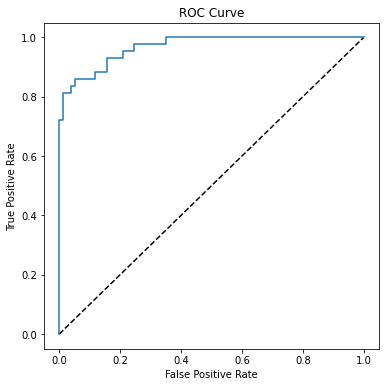

In [57]:
evaluate()

In [58]:
from sklearn.ensemble import RandomForestClassifier

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])

# fit the pipeline to train a random forest model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                             

Confusion Matrix:
 [[74  3]
 [ 4 39]] 

Accuracy: 0.9416666666666667
Overall Precision: 0.9285714285714286
Overall Recall: 0.9069767441860465

AUC: 0.9916943521594684


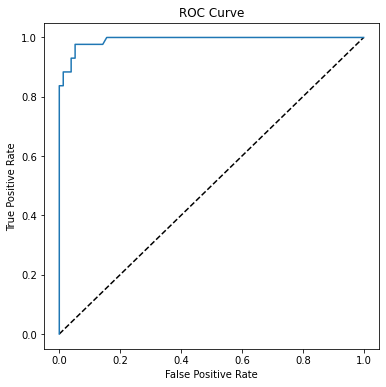

In [59]:
evaluate()